In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# CUDAの状態を詳しく表示
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # すべてのログを表示
print("\nCUDA情報:")
print("CUDA_VISIBLE_DEVICES:", os.environ.get('CUDA_VISIBLE_DEVICES', 'Not set'))

2025-04-20 19:54:21.531368: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 19:54:21.719391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745146461.787227    7636 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745146461.807366    7636 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745146461.959207    7636 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

CUDA情報:
CUDA_VISIBLE_DEVICES: 0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
import os
current_dir = os.getcwd()
print(current_dir)


/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction


In [19]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "data", "processed", "processed.csv"))
yld_path = os.path.abspath(os.path.join(os.getcwd(), "data", "processed", "combined_yield_df.csv"))

In [20]:
data  = pd.read_csv(data_path)
yld = pd.read_csv(yld_path)

In [21]:
data.head()


,Unnamed: 0,region,year,prep_temp_2m,prep_soil_temp_l1,prep_soil_water_vol_l1,prep_net_solar_radiation,prep_total_rain,plnt_temp_2m,plnt_soil_temp_l1,...,head_soil_temp_l1,head_soil_water_vol_l1,head_net_solar_radiation,head_total_rain,hvst_temp_2m,hvst_soil_temp_l1,hvst_soil_water_vol_l1,hvst_net_solar_radiation,hvst_total_rain,yield
0,0,Asahi,1993,-0.060562,-0.003973,2.238262,0.959389,0.951731,-1.572648,-1.342187,...,-1.779114,2.890841,-1.078292,0.628321,-1.455501,-1.898463,2.120006,0.689816,-0.110071,-3.160995
1,1,Asahi,1994,-0.805556,-0.793434,2.159424,1.180903,0.654922,0.434492,0.458058,...,1.193804,0.613343,1.850544,-0.119432,1.678067,1.329429,1.796030,0.005523,-0.717270,0.946735
2,2,Asahi,1995,-0.147400,-0.194907,1.660719,0.999355,-0.923270,-0.360754,-0.193593,...,0.409513,0.040694,1.606052,-0.084138,0.834788,0.332058,1.697519,1.255880,-0.810901,-0.539039
3,3,Asahi,1996,-1.168914,-1.154994,1.389486,1.119742,-1.310899,-1.849488,-1.477762,...,-1.806703,1.487743,0.555155,0.772871,-0.915708,-1.573629,2.101935,1.114677,-0.799842,-0.247711
4,4,Asahi,1997,0.584949,0.549297,1.630429,1.465555,-1.039116,0.187119,0.445647,...,-0.633121,0.932983,0.572341,-1.211379,-0.732967,-0.969184,0.823075,3.124311,-1.237997,0.509743


In [22]:
data.drop(columns=['Unnamed: 0', 'yield'], inplace=True)
data

,region,year,prep_temp_2m,prep_soil_temp_l1,prep_soil_water_vol_l1,prep_net_solar_radiation,prep_total_rain,plnt_temp_2m,plnt_soil_temp_l1,plnt_soil_water_vol_l1,...,head_temp_2m,head_soil_temp_l1,head_soil_water_vol_l1,head_net_solar_radiation,head_total_rain,hvst_temp_2m,hvst_soil_temp_l1,hvst_soil_water_vol_l1,hvst_net_solar_radiation,hvst_total_rain
0,Asahi,1993,-0.060562,-0.003973,2.238262,0.959389,0.951731,-1.572648,-1.342187,1.813258,...,-1.568093,-1.779114,2.890841,-1.078292,0.628321,-1.455501,-1.898463,2.120006,0.689816,-0.110071
1,Asahi,1994,-0.805556,-0.793434,2.159424,1.180903,0.654922,0.434492,0.458058,1.678270,...,0.916187,1.193804,0.613343,1.850544,-0.119432,1.678067,1.329429,1.796030,0.005523,-0.717270
2,Asahi,1995,-0.147400,-0.194907,1.660719,0.999355,-0.923270,-0.360754,-0.193593,2.315816,...,0.079085,0.409513,0.040694,1.606052,-0.084138,0.834788,0.332058,1.697519,1.255880,-0.810901
3,Asahi,1996,-1.168914,-1.154994,1.389486,1.119742,-1.310899,-1.849488,-1.477762,1.341087,...,-1.952744,-1.806703,1.487743,0.555155,0.772871,-0.915708,-1.573629,2.101935,1.114677,-0.799842
4,Asahi,1997,0.584949,0.549297,1.630429,1.465555,-1.039116,0.187119,0.445647,1.697100,...,-0.736978,-0.633121,0.932983,0.572341,-1.211379,-0.732967,-0.969184,0.823075,3.124311,-1.237997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Sanmu,2019,-0.196702,-0.362883,-0.571154,-0.380016,-0.625504,0.643463,0.365435,-0.605786,...,1.199148,1.094681,-0.622836,0.660059,-1.007219,1.718072,1.818263,-0.537590,-0.626865,0.896926
151,Sanmu,2020,0.839417,0.910809,-0.322928,-0.487355,0.332045,0.910747,0.784296,-0.376874,...,1.250882,1.252433,-0.815119,0.638405,-1.570382,-1.315796,-1.135402,-0.403589,-1.552317,0.623271
152,Sanmu,2021,1.336494,1.294814,-0.720712,0.829473,-0.974916,1.286193,1.240299,-0.754766,...,-0.473915,-0.632906,0.155173,-1.314081,0.998547,-0.434001,-0.187704,-0.331801,0.016537,0.188167
153,Sanmu,2022,-0.572632,-0.662868,-0.481456,-0.158865,0.330074,-0.060931,-0.257765,-0.185638,...,0.533260,0.461920,-0.076307,-1.512841,-0.831394,-0.940632,-0.746253,-0.450828,-2.356662,-1.029052


In [23]:
X = data.drop(columns=['region', 'year'])
y = yld['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, shuffle=False)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 出力層は単一ノード（収穫量予測）
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745147520.600453    7636 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [25]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


I0000 00:00:1745147523.026904   11509 service.cc:152] XLA service 0x7f67c4006080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745147523.026927   11509 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-04-20 20:12:03.061348: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745147523.160608   11509 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 282845.9375 - mae: 530.3347

I0000 00:00:1745147523.997217   11509 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - loss: 286351.2812 - mae: 533.6725 - val_loss: 289371.0312 - val_mae: 537.7010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 290440.6250 - mae: 537.6641 - val_loss: 289014.3125 - val_mae: 537.3694
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 286673.4062 - mae: 533.8954 - val_loss: 288678.0312 - val_mae: 537.0566
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 285964.0625 - mae: 533.2701 - val_loss: 288355.6562 - val_mae: 536.7566
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 285162.8438 - mae: 532.7023 - val_loss: 288046.0312 - val_mae: 536.4682
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 286576.9062 - mae: 533.9551 - val_loss: 287744.8750 - val_mae: 536.1873
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 286597.9688 - mae: 534.0061 - val_loss: 287431.4062 - val_mae: 535.8951
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 285055.4062 - mae: 532.5359 - val_loss: 287

In [26]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'テストデータのMAE: {test_mae:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 43682.7539 - mae: 194.0240
テストデータのMAE: 194.0240


In [27]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Text(0.5, 1.0, 'Predicted vs. Actual Yield')

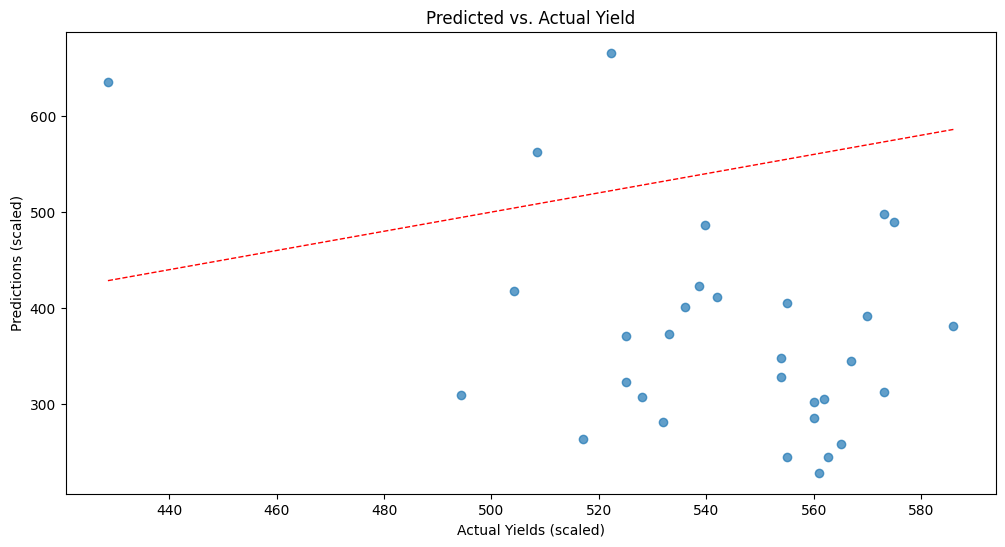

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)
plt.xlabel('Actual Yields (scaled)')
plt.ylabel('Predictions (scaled)')
plt.title('Predicted vs. Actual Yield')

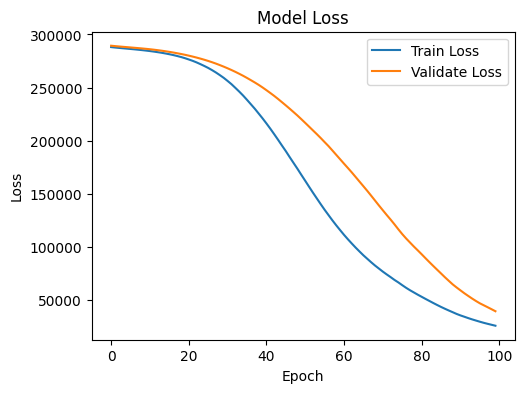

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validate Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

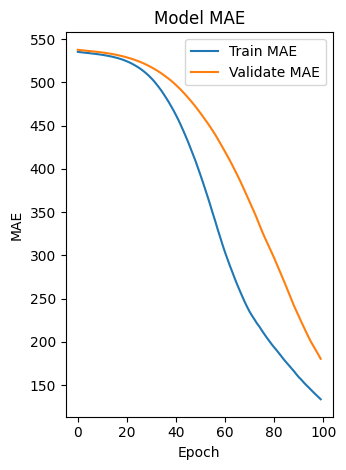

In [30]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validate MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
score = r2 - rmse
print(f"R2: {r2}")
print(f"RMSE: {rmse}")
print(f"Score: {score}")

R2: -45.62336668396399
RMSE: 209.0041946791982
Score: -254.6275613631622


In [32]:
# 特徴量とターゲットを分離
X = data[data.columns[2:27]].values
y = yld['yield'].values
X


array([[-0.0605619 , -0.00397282,  2.23826207, ...,  2.12000648,
         0.68981631, -0.11007064],
       [-0.80555556, -0.79343352,  2.15942409, ...,  1.79602955,
         0.00552313, -0.71726995],
       [-0.14740032, -0.19490686,  1.66071878, ...,  1.69751915,
         1.25587995, -0.81090144],
       ...,
       [ 1.3364944 ,  1.2948145 , -0.72071234, ..., -0.33180076,
         0.01653679,  0.18816655],
       [-0.57263177, -0.66286765, -0.48145575, ..., -0.45082831,
        -2.35666238, -1.02905223],
       [ 1.46396505,  1.40630047, -0.5103229 , ..., -0.89833861,
        -0.65310908, -1.00851644]])

In [33]:

# 手動でクロスバリデーションとグリッドサーチを実装
def create_model(neurons1, neurons2, activation, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons1, activation=activation, input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(neurons2, activation=activation),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# パラメータグリッドの定義
param_grid1 = {
    'neurons1': [32, 64], # 32, 64
    'neurons2': [16], # 16, 32
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.01, 0.001],
    'batch_size': [16], #16, 32
    'epochs': [100] #50, 100
}


In [39]:

# 可能なすべてのパラメータの組み合わせを生成
import itertools
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
import numpy as np

# 時系列クロスバリデーション
tscv = TimeSeriesSplit(n_splits=5)

params_list1 = [dict(zip(param_grid1.keys(), v)) for v in itertools.product(*param_grid1.values())]


# 結果を保存するためのリスト
results = []

# 各パラメータの組み合わせに対してクロスバリデーションを実行
for params in params_list1:  # 試行回数を制限（本来はすべてを実行）
    print(f"パラメータ: {params}")
    cv_scores = []
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # モデルの作成
        model = create_model(
            neurons1=params['neurons1'],
            neurons2=params['neurons2'],
            activation=params['activation'],
            learning_rate=params['learning_rate']
        )
        
        # モデルの学習
        history = model.fit(
            X_train, y_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(X_val, y_val),
            verbose=0
        )
        
        # バリデーションデータでの評価
        _, val_mae = model.evaluate(X_val, y_val, verbose=0)
        cv_scores.append(val_mae)
    
    # クロスバリデーションスコアの平均
    mean_cv_score = np.mean(cv_scores)
    print(f"  平均MAE: {mean_cv_score:.4f}")
    
    # 結果を保存
    results.append({
        'params': params,
        'mean_cv_score': mean_cv_score
    })


パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}


/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  平均MAE: 145.0163
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100}
  平均MAE: 263.0603
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'tanh', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}
  平均MAE: 449.1164
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'tanh', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100}
  平均MAE: 519.8345
パラメータ: {'neurons1': 64, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}
  平均MAE: 142.4664
パラメータ: {'neurons1': 64, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100}
  平均MAE: 235.9191
パラメータ: {'neurons1': 64, 'neurons2': 16, 'activation': 'tanh', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}
  平均MAE: 451.8024
パラメータ: {'neurons1': 64, 'neurons2': 16, 'activation': 'tanh', 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100}
  平均MAE: 520.6103


活性関数＝RELU
Neurons1=32
Learning rate=0.01

In [40]:
results

[{'params': {'neurons1': 32,
   'neurons2': 16,
   'activation': 'relu',
   'learning_rate': 0.01,
   'batch_size': 16,
   'epochs': 100},
  'mean_cv_score': np.float64(145.01630859375)},
 {'params': {'neurons1': 32,
   'neurons2': 16,
   'activation': 'relu',
   'learning_rate': 0.001,
   'batch_size': 16,
   'epochs': 100},
  'mean_cv_score': np.float64(263.06029357910154)},
 {'params': {'neurons1': 32,
   'neurons2': 16,
   'activation': 'tanh',
   'learning_rate': 0.01,
   'batch_size': 16,
   'epochs': 100},
  'mean_cv_score': np.float64(449.1163757324219)},
 {'params': {'neurons1': 32,
   'neurons2': 16,
   'activation': 'tanh',
   'learning_rate': 0.001,
   'batch_size': 16,
   'epochs': 100},
  'mean_cv_score': np.float64(519.8345153808593)},
 {'params': {'neurons1': 64,
   'neurons2': 16,
   'activation': 'relu',
   'learning_rate': 0.01,
   'batch_size': 16,
   'epochs': 100},
  'mean_cv_score': np.float64(142.46644592285156)},
 {'params': {'neurons1': 64,
   'neurons2': 16,


In [41]:
# 上記を固定して次のパラメータのチューニング
param_grid2 = {
    'neurons1': [32], # 32
    'neurons2': [16, 32], # 16, 32
    'activation': ['relu'], # relu
    'learning_rate': [0.01],
    'batch_size': [16, 32], #16, 32
    'epochs': [100, 200] #50, 100
}

params_list2 = [dict(zip(param_grid2.keys(), v)) for v in itertools.product(*param_grid2.values())]


# 各パラメータの組み合わせに対してクロスバリデーションを実行
for params in params_list2:  # 試行回数を制限（本来はすべてを実行）
    print(f"パラメータ: {params}")
    cv_scores = []
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # モデルの作成
        model = create_model(
            neurons1=params['neurons1'],
            neurons2=params['neurons2'],
            activation=params['activation'],
            learning_rate=params['learning_rate']
        )
        
        # モデルの学習
        history = model.fit(
            X_train, y_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(X_val, y_val),
            verbose=0
        )
        
        # バリデーションデータでの評価
        _, val_mae = model.evaluate(X_val, y_val, verbose=0)
        cv_scores.append(val_mae)
    
    # クロスバリデーションスコアの平均
    mean_cv_score = np.mean(cv_scores)
    print(f"  平均MAE: {mean_cv_score:.4f}")
    
    # 結果を保存
    results.append({
        'params': params,
        'mean_cv_score': mean_cv_score
    })


パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}
  平均MAE: 143.1267
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 200}
  平均MAE: 132.7954
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 100}
  平均MAE: 151.2258
パラメータ: {'neurons1': 32, 'neurons2': 16, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 200}
  平均MAE: 140.0054
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 100}
  平均MAE: 132.3531
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 200}
  平均MAE: 130.2126
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 100}
  平均MAE: 149.2663
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activat

バッチサイズは小さい方が良さそう
ニューロン２は32で
また、エポック数が増えると精度が上がるので、300, 500とも比較

In [44]:
# 上記を固定して次のパラメータのチューニング
param_grid3 = {
    'neurons1': [32], # 32
    'neurons2': [32], # 16, 32
    'activation': ['relu'], # relu
    'learning_rate': [0.01],
    'batch_size': [16],
    'epochs': [200, 300, 500] #50, 100
}

params_list3 = [dict(zip(param_grid3.keys(), v)) for v in itertools.product(*param_grid3.values())]


# 各パラメータの組み合わせに対してクロスバリデーションを実行
for params in params_list3:  # 試行回数を制限（本来はすべてを実行）
    print(f"パラメータ: {params}")
    cv_scores = []
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # モデルの作成
        model = create_model(
            neurons1=params['neurons1'],
            neurons2=params['neurons2'],
            activation=params['activation'],
            learning_rate=params['learning_rate']
        )
        
        # モデルの学習
        history = model.fit(
            X_train, y_train,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_data=(X_val, y_val),
            verbose=0
        )
        
        # バリデーションデータでの評価
        _, val_mae = model.evaluate(X_val, y_val, verbose=0)
        cv_scores.append(val_mae)
    
    # クロスバリデーションスコアの平均
    mean_cv_score = np.mean(cv_scores)
    print(f"  平均MAE: {mean_cv_score:.4f}")
    
    # 結果を保存
    results.append({
        'params': params,
        'mean_cv_score': mean_cv_score
    })


パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 200}


/home/automatedtomato/github.com/automatedtomato/rice-yield-prediction/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  平均MAE: 126.8602
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 300}
  平均MAE: 127.5873
パラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 500}
  平均MAE: 128.6676


In [45]:

# 結果をスコア順にソート
results.sort(key=lambda x: x['mean_cv_score'])

# 最良のパラメータの表示
best_params = results[0]['params']
best_score = results[0]['mean_cv_score']
print(f"\n最良のスコア: {best_score:.4f}")
print(f"最良のパラメータ: {best_params}")
    



最良のスコア: 126.8602
最良のパラメータ: {'neurons1': 32, 'neurons2': 32, 'activation': 'relu', 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 200}


In [46]:

# 最良のパラメータでモデルを再トレーニング
model = create_model(
    neurons1=best_params['neurons1'],
    neurons2=best_params['neurons2'],
    activation=best_params['activation'],
    learning_rate=best_params['learning_rate']
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 285620.3125 - mae: 533.3973
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274796.2500 - mae: 522.9446 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246237.4219 - mae: 494.2637 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192798.3906 - mae: 434.9174 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108538.8047 - mae: 316.8488 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45112.6758 - mae: 182.2917 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28933.3262 - mae: 145.5790 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20067.3555 - mae: 111.0199 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13244.3721 - mae: 93.6620 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12810.2627 - mae: 90.1764 
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9930.3379 - mae: 77.1348  
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 855

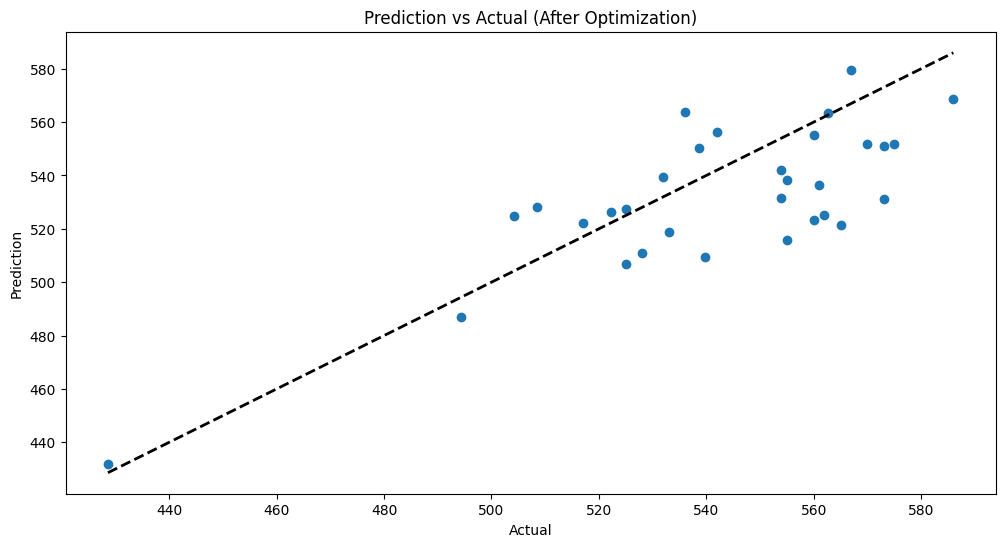

In [47]:
from sklearn.model_selection import train_test_split
# データを再度分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, shuffle=False)

# 最良のパラメータでモデルを訓練
model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

# テストデータでの評価
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'テストデータのMAE: {test_mae:.4f}')

# 予測の実行
predictions = model.predict(X_test)

# 結果の可視化
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual (After Optimization)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# テストデータでの評価
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'R2: {r2}')
print(f'RMSE: {rmse}')
print(f'Score: {r2-rmse}')

R2: 0.4785571954239498
RMSE: 22.10326988296134
Score: -21.62471268753739
